Following notes from this page: https://medium.com/modern-physics/finite-difference-solution-of-the-schrodinger-equation-c49039d161a8

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# define smallest and largest bondlengths in atomic units (here x=0 is the equilibrium value)
x_min = -6
x_max = 6

# number of grid points 
N = 1001

# define grid
x = np.linspace(x_min, x_max, N)

# define grid spacing h
h = x[1]-x[0]

# compute Harmonic potential with k = 1
def Vpot(x):
    return  1/2 * x ** 2

V_x = Vpot(x)

# create arrays for T, V, and H - we truncate the smallest and largest grid points where 
# the centered finite difference derivatives cannot be defined
T = np.zeros((N-2, N-2))
V = np.zeros((N-2, N-2))
H = np.zeros((N-2, N-2))

# this uses the 3 point stencil; we can adapt to use a 5 point and it might improve accuracy
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0



for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0
            
H = -T/(2*h**2) + V

vals, vecs = np.linalg.eigh(H)
print(vals[0])
print(vecs[0,:])

0.49999549995988224
[ 1.78244662e-10 -1.46799993e-09 -8.41479354e-09  3.87317210e-08
  1.51687636e-07 -5.21461852e-07 -1.60391607e-06  4.46962122e-06
  1.13800947e-05 -2.66193217e-05 -5.73849959e-05  1.14138825e-04
  2.09338911e-04 -3.53561144e-04 -5.49741492e-04  7.89293419e-04
  1.05430080e-03 -1.32507003e-03 -1.58724876e-03  1.83406296e-03
  2.06442589e-03 -2.28005782e-03 -2.48348835e-03  2.67712319e-03
  2.86295246e-03 -3.04253500e-03 -3.21706937e-03  3.38747566e-03
  3.55446484e-03 -3.71859192e-03 -3.88029522e-03  4.03992496e-03
  4.19776417e-03 -4.35404402e-03 -4.50895515e-03  4.66265626e-03
  4.81528052e-03 -4.96694055e-03 -5.11773224e-03  5.26773776e-03
  5.41702794e-03 -5.56566416e-03 -5.71369987e-03  5.86118183e-03
  6.00815110e-03 -6.15464392e-03 -6.30069233e-03  6.44632479e-03
  6.59156664e-03 -6.73644050e-03 -6.88096664e-03  7.02516324e-03
  7.16904664e-03 -7.31263157e-03 -7.45593133e-03  7.59895794e-03
  7.74172229e-03 -7.88423425e-03 -8.02650276e-03  8.16853598e-03
  8.3

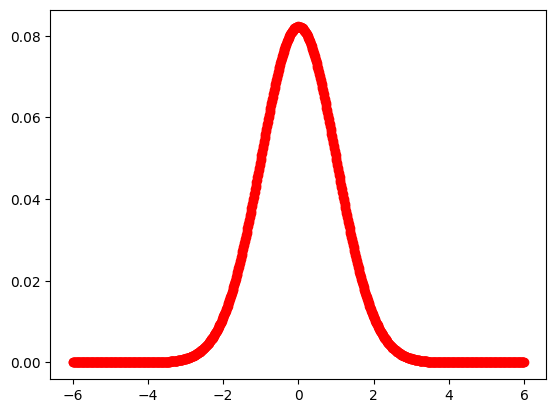

In [3]:
#plt.plot(x, V_x)
plt.plot(x[1:1000], vecs[:,0], 'ro')